In [ ]:
#  print( 'opening_mouth_distances', opening_mouth_distances_out,'opening_mouth_distances_avg', opening_mouth_distances_avg,'\n'
#     ,'kissing_smiling_mouth_distances',kissing_smiling_mouth_distances_out,'kissing_smiling_mouth_distances_avg', kissing_smiling_mouth_distances_avg,'\n'
#     'rising_right_up_lip_distances', rising_right_up_lip_distances_out, 'rising_right_up_lip_distances_avg', rising_right_up_lip_distances_avg,'\n'
#     'rising_left_up_lip_distances', rising_left_up_lip_distances_out,'rising_left_up_lip_distances_avg', rising_left_up_lip_distances_avg,'\n'
#     'drooping_lower_lip_distances', drooping_lower_lip_distances_out, 'drooping_lower_lip_distances_avg',drooping_lower_lip_distances_avg,'\n'
#     'right_half_smiling_distances',right_half_smiling_distances_out,'right_half_smiling_distances_avg', right_half_smiling_distances_avg,'\n'
#     'left_half_smiling_distances',left_half_smiling_distances_out,'left_half_smiling_distances_avg', left_half_smiling_distances_avg,'\n'
#     'right_kissing_distances',right_kissing_distances_out,'right_kissing_distances_avg', right_kissing_distances_avg,'\n'
#     'left_kissing_distances',left_kissing_distances_out,'left_kissing_distances_avg', left_kissing_distances_avg )
    

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from dist_functions import *

def analyze_mouth(image_path):
    # Initialize the MediaPipe FaceMesh solution
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

    # Load an image
    image = cv2.imread(image_path)

    # Process the image to find face landmarks
    results = face_mesh.process(image)

    if results.multi_face_landmarks:
        # Get the first detected face
        landmarks = results.multi_face_landmarks[0]

        image_copy = image.copy()
        draw_indecies(landmarks, image, LIPS, (0, 0, 255), image_copy)

        # Call your distance calculation functions
        opening_mouth_distances_out, opening_mouth_distances_avg = opening_mouth_distances(landmarks)
        kissing_smiling_mouth_distances_out, kissing_smiling_mouth_distances_avg = kissing_smiling_mouth_distances(
            landmarks)
        rising_right_up_lip_distances_out, rising_right_up_lip_distances_avg = rising_right_up_lip_distances(
            landmarks)
        rising_left_up_lip_distances_out, rising_left_up_lip_distances_avg = rising_left_up_lip_distances(
            landmarks)
        drooping_lower_lip_distances_out, drooping_lower_lip_distances_avg = drooping_lower_lip_distances(landmarks)
        right_half_smiling_distances_out, right_half_smiling_distances_avg = right_half_smiling_distances(landmarks)
        left_half_smiling_distances_out, left_half_smiling_distances_avg = left_half_smiling_distances(landmarks)
        right_kissing_distances_out, right_kissing_distances_avg = right_kissing_distances(landmarks)
        left_kissing_distances_out, left_kissing_distances_avg = left_kissing_distances(landmarks)
        
        

        plt.imshow(image_copy[:, :, ::-1])
        plt.show()
        print('opening_mouth_distances_avg', opening_mouth_distances_avg, '\n'
              'kissing_smiling_mouth_distances_avg', kissing_smiling_mouth_distances_avg, '\n'
              'rising_right_up_lip_distances_avg', rising_right_up_lip_distances_avg, '\n'
              'rising_left_up_lip_distances_avg', rising_left_up_lip_distances_avg, '\n'
              'drooping_lower_lip_distances_avg', drooping_lower_lip_distances_avg, '\n'
              'right_half_smiling_distances_avg', right_half_smiling_distances_avg, '\n'
              'left_half_smiling_distances_avg', left_half_smiling_distances_avg, '\n'
              'right_kissing_distances_avg', right_kissing_distances_avg, '\n'
              'left_kissing_distances_avg', left_kissing_distances_avg)

    # Release resources
    face_mesh.close()
    sum_of_avgs = (
    opening_mouth_distances_avg +
    kissing_smiling_mouth_distances_avg +
    rising_right_up_lip_distances_avg +
    rising_left_up_lip_distances_avg +
    drooping_lower_lip_distances_avg +
    right_half_smiling_distances_avg +
    left_half_smiling_distances_avg +
    right_kissing_distances_avg +
    left_kissing_distances_avg
    )

    # Calculate percentages for each distance measure
    percentage_opening_mouth = (opening_mouth_distances_avg / sum_of_avgs) * 100
    percentage_kissing_smiling_mouth = (kissing_smiling_mouth_distances_avg / sum_of_avgs) * 100
    percentage_rising_right_up_lip = (rising_right_up_lip_distances_avg / sum_of_avgs) * 100
    percentage_rising_left_up_lip = (rising_left_up_lip_distances_avg / sum_of_avgs) * 100
    percentage_drooping_lower_lip = (drooping_lower_lip_distances_avg / sum_of_avgs) * 100
    percentage_right_half_smiling = (right_half_smiling_distances_avg / sum_of_avgs) * 100
    percentage_left_half_smiling = (left_half_smiling_distances_avg / sum_of_avgs) * 100
    percentage_right_kissing = (right_kissing_distances_avg / sum_of_avgs) * 100
    percentage_left_kissing = (left_kissing_distances_avg / sum_of_avgs) * 100

    # Print the percentages
    print('Percentage of opening_mouth_distances_avg:', percentage_opening_mouth)
    print('Percentage of kissing_smiling_mouth_distances_avg:', percentage_kissing_smiling_mouth)
    print('Percentage of rising_right_up_lip_distances_avg:', percentage_rising_right_up_lip)
    print('Percentage of rising_left_up_lip_distances_avg:', percentage_rising_left_up_lip)
    print('Percentage of drooping_lower_lip_distances_avg:', percentage_drooping_lower_lip)
    print('Percentage of right_half_smiling_distances_avg:', percentage_right_half_smiling)
    print('Percentage of left_half_smiling_distances_avg:', percentage_left_half_smiling)
    print('Percentage of right_kissing_distances_avg:', percentage_right_kissing)
    print('Percentage of left_kissing_distances_avg:', percentage_left_kissing)

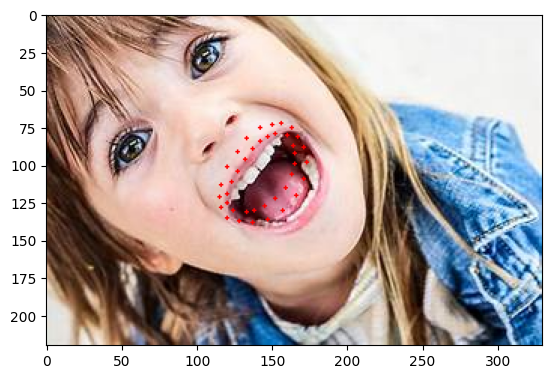

opening_mouth_distances_avg 0.10977201201044506 
kissing_smiling_mouth_distances_avg 0.25196562642548304 
rising_right_up_lip_distances_avg 0.08217733858163685 
rising_left_up_lip_distances_avg 0.12591015366384356 
drooping_lower_lip_distances_avg 0.24736427857078597 
right_half_smiling_distances_avg 0.1328472578278785 
left_half_smiling_distances_avg 0.18629267586246986 
right_kissing_distances_avg 0.3641516072741014 
left_kissing_distances_avg 0.4292038593102647
Percentage of opening_mouth_distances_avg: 5.688598027434195
Percentage of kissing_smiling_mouth_distances_avg: 13.057346214341406
Percentage of rising_right_up_lip_distances_avg: 4.258588665668351
Percentage of rising_left_up_lip_distances_avg: 6.52490774877957
Percentage of drooping_lower_lip_distances_avg: 12.818895466738478
Percentage of right_half_smiling_distances_avg: 6.884401907089065
Percentage of left_half_smiling_distances_avg: 9.65404686520501
Percentage of right_kissing_distances_avg: 18.871040777036463
Percentag

In [2]:
analyze_mouth('pictures\opened_mouth2.jpeg')

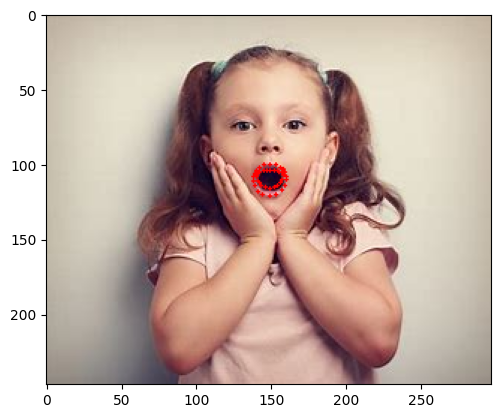

opening_mouth_distances_avg 0.04424343433809317 
kissing_smiling_mouth_distances_avg 0.06081991999361648 
rising_right_up_lip_distances_avg 0.041215606328800114 
rising_left_up_lip_distances_avg 0.041611163468322616 
drooping_lower_lip_distances_avg 0.0767869240907866 
right_half_smiling_distances_avg 0.06935511840587141 
left_half_smiling_distances_avg 0.06523178973430598 
right_kissing_distances_avg 0.12576581256716118 
left_kissing_distances_avg 0.12090970147166716
Percentage of opening_mouth_distances_avg: 6.849470633957309
Percentage of kissing_smiling_mouth_distances_avg: 9.415730541451978
Percentage of rising_right_up_lip_distances_avg: 6.380722686502649
Percentage of rising_left_up_lip_distances_avg: 6.44196017974306
Percentage of drooping_lower_lip_distances_avg: 11.887634617435525
Percentage of right_half_smiling_distances_avg: 10.737092496154586
Percentage of left_half_smiling_distances_avg: 10.098746511658417
Percentage of right_kissing_distances_avg: 19.470216379492662
Per

In [3]:
analyze_mouth('pictures\opened_mouth1.jpeg')

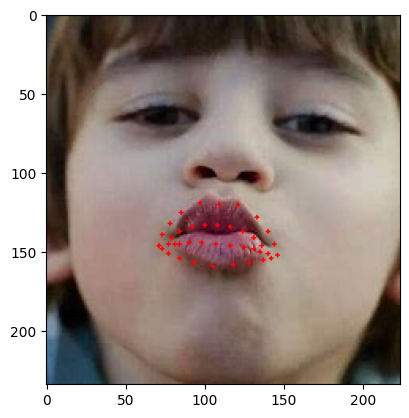

opening_mouth_distances_avg 0.10362387785314774 
kissing_smiling_mouth_distances_avg 0.2758796812415892 
rising_right_up_lip_distances_avg 0.13796584898298409 
rising_left_up_lip_distances_avg 0.14981164458552598 
drooping_lower_lip_distances_avg 0.3988076603909533 
right_half_smiling_distances_avg 0.3110911477650204 
left_half_smiling_distances_avg 0.2936628318119683 
right_kissing_distances_avg 0.5618395009142487 
left_kissing_distances_avg 0.537421072745817
Percentage of opening_mouth_distances_avg: 3.74079476076299
Percentage of kissing_smiling_mouth_distances_avg: 9.959183998614964
Percentage of rising_right_up_lip_distances_avg: 4.980530894348183
Percentage of rising_left_up_lip_distances_avg: 5.408161002824306
Percentage of drooping_lower_lip_distances_avg: 14.396851743541525
Percentage of right_half_smiling_distances_avg: 11.230308687427524
Percentage of left_half_smiling_distances_avg: 10.601151061243213
Percentage of right_kissing_distances_avg: 20.282258345786
Percentage of 

In [4]:
analyze_mouth('pictures\kissing_mouth2.jpeg')

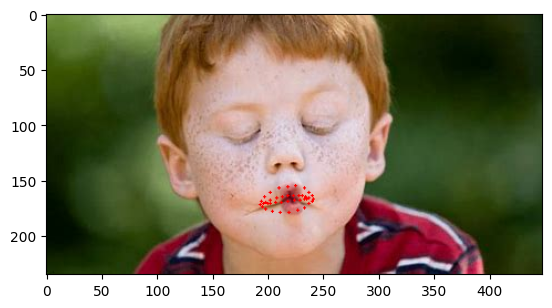

opening_mouth_distances_avg 0.04656405388771151 
kissing_smiling_mouth_distances_avg 0.09117194192611044 
rising_right_up_lip_distances_avg 0.0837124384333836 
rising_left_up_lip_distances_avg 0.0933366674320813 
drooping_lower_lip_distances_avg 0.16838474758054914 
right_half_smiling_distances_avg 0.12001648702077967 
left_half_smiling_distances_avg 0.13210877157688433 
right_kissing_distances_avg 0.19304552046442014 
left_kissing_distances_avg 0.20991043307601132
Percentage of opening_mouth_distances_avg: 4.090842123224057
Percentage of kissing_smiling_mouth_distances_avg: 8.009827095099613
Percentage of rising_right_up_lip_distances_avg: 7.354479277231951
Percentage of rising_left_up_lip_distances_avg: 8.2000070632441
Percentage of drooping_lower_lip_distances_avg: 14.79328711310395
Percentage of right_half_smiling_distances_avg: 10.543938072272265
Percentage of left_half_smiling_distances_avg: 11.6062946090853
Percentage of right_kissing_distances_avg: 16.959836631062153
Percentage

In [5]:
analyze_mouth('pictures\kissing_mouth3.jpeg')